## Example using IRIS dataset

In [1]:
import os
import shutil
import tempfile
import unittest
import pandas as pd
import seaborn as snsx
import matplotlib.pyplot as plt
import numpy as np

from scivae import Optimiser, VAE, Validate
from sciviso import Scatterplot

# Set the location of the mnist data
data_dir = '../tests/data/'
loss = {'loss_type': 'mse', 'distance_metric': 'mmd', 'mmd_weight': 1}
encoding = {'layers':[{'num_nodes': 3, 'activation_fn': 'selu'}]} 
decoding = {'layers': [{'num_nodes': 3, 'activation_fn': 'selu'}]}
latent = {'num_nodes': 2}
optimisers = {'name': 'adam', 'params': {}}

config = {'loss': loss, 'encoding': encoding, 'decoding': decoding, 'latent': latent, 'optimiser': optimisers}

# Path to the data
data = f'{data_dir}iris.csv'

# Build a simple vae to learn the relations in the iris dataset
df = pd.read_csv(data)

# Set up what the columns are
value_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
vae = VAE(df[value_cols].values, df[value_cols].values, df['label'].values, config, 'vae')
vae.encode('default')

# Lets have a look at a scatterplot version & apply the class colours to our plot
encoding = vae.get_encoded_data()
decoding = vae.decoder.predict(encoding)


None
Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
default_input (InputLayer)      [(None, 4)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 3)            15          default_input[0][0]              
__________________________________________________________________________________________________
z_mean (Dense)                  (None, 2)            8           dense[0][0]                      
__________________________________________________________________________________________________
z_log_sigma (Dense)             (None, 2)            8           dense[0][0]                      
_______________________________________________________________________________________

1/3 [=========>....................] - ETA: 0s - loss: 0.4196WARNING:tensorflow:From /Users/ariane/opt/miniconda3/envs/ml/lib/python3.8/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
3/3 [==============================] - 0s 77ms/step - loss: 0.4339 - val_loss: 0.3633
Epoch 2/50
3/3 [==============================] - 0s 6ms/step - loss: 0.3668 - val_loss: 0.3064
Epoch 3/50
3/3 [==============================] - 0s 5ms/step - loss: 0.3500 - val_loss: 0.3857
Epoch 4/50
3/3 [==============================] - 0s 6ms/step - loss: 0.3315 - val_loss: 0.3355
Epoch 5/50
3/3 [==============================] - 0s 5ms/step - loss: 0.3406 - val_loss: 0.2867
Epoch 6/50
3/3 [==============================] - 0s 5ms/step - loss: 0.3339 - val_loss: 0.3230
Epoch 7/50
3/3 [==============================] - 0s 5ms/step - loss:

## Visualise the latent space

Visualise and colour the latent space.


<AxesSubplot:title={'center':'Latent space coloured by class'}, xlabel='asd'>

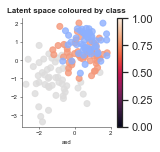

In [2]:
import seaborn as sns
vis_df = pd.DataFrame()
vis_df['latent_0'] = encoding[:, 0]
vis_df['latent_1'] = encoding[:, 1]
labels = df['label'].values
lut = dict(zip(set(labels), sns.color_palette("coolwarm", len(set(labels)))))
row_colors2 = pd.DataFrame(labels)[0].map(lut)
vis_df['label'] = row_colors2
scatter = Scatterplot(vis_df, 'latent_0', 'latent_1', colour=row_colors2, title='Latent space coloured by class', xlabel='asd')
scatter.plot()

## Print out the accuracy

Here we just get the accuracy of the encoding space when we use it as features for a classifier.

In [3]:

vd = Validate(vae, labels)
print(vd.predict('rf', 'accuracy'))
print(vd.predict('svm', 'balanced_accuracy'))

0.69
0.7106357694592988
